In [ ]:
!wget https://raw.githubusercontent.com/doctorai-in/EY_workshop/main/datasets/BostonHousing.csv

--2021-06-17 01:59:20--  https://raw.githubusercontent.com/doctorai-in/EY_workshop/main/datasets/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35735 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  34.90K  --.-KB/s    in 0s      

2021-06-17 01:59:20 (105 MB/s) - ‘BostonHousing.csv’ saved [35735/35735]



Data Description
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000
* PTRATIO - pupil-teacher ratio by town

* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
bos1 = pd.read_csv('BostonHousing.csv')
bos1

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
bos1.shape

(506, 14)

In [ ]:
# check the column names
bos1.columns.values

array(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'b', 'lstat', 'medv'], dtype=object)

In [ ]:
bos1.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [ ]:
bos1.shape

(506, 14)

# Check null or missing values in data

In [ ]:
bos1.isna()

In [ ]:
bos1.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
# total null values
bos1.isna().sum().sum()

0

In [ ]:
bos1.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# check if there are duplicate rows or not 

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

bos1_rows_df = bos1[bos1.duplicated()]
print( "number of duplicate rows: ", bos1_rows_df.shape)

number of duplicate rows:  (0, 14)


In [ ]:
x = bos1.iloc[:,0:13]
y = bos1["medv"]

In [ ]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

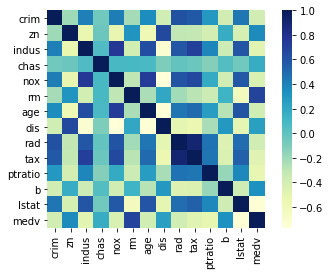

In [ ]:
#code to plot correlation

#librarry to establish correlation
import seaborn as sns
names = []
#creating a correlation matrix
correlations = bos1.corr()
sns.heatmap(correlations,square = True, cmap = "YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# Base Model

In [ ]:
from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.33, random_state =10)

In [ ]:
x_train.shape

(339, 13)

In [ ]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [ ]:
#Equation coefficient and Intercept
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficient: 
 [-1.56353750e-01  6.60616548e-02 -2.01655290e-02  1.57889806e+00
 -1.53490777e+01  3.34105533e+00  1.14773954e-02 -1.55360652e+00
  3.05450100e-01 -1.21583833e-02 -8.14405729e-01  1.32763069e-02
 -5.45290138e-01]
Intercept: 
 34.213297257606456


In [ ]:
pred_y = lm.predict(x_test)
print(y_test)

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
       ... 
442    18.4
451    15.2
188    29.8
76     20.0
314    23.8
Name: medv, Length: 167, dtype: float64


In [ ]:
pred_y

array([31.43849583, 31.98794389, 30.99895559, 22.31396689, 18.89492791,
       16.21371128, 35.9881236 , 14.81264582, 25.04500847, 37.12806894,
       21.49110158, 30.88757187, 28.05752881, 34.05600093, 33.75791114,
       40.63880011, 24.24023412, 23.41351375, 25.54158122, 21.34135664,
       32.71699711, 17.88341061, 25.49549436, 25.01006418, 32.54102925,
       20.48979076, 19.48816948, 16.92733183, 38.38530857,  0.36265208,
       32.42715816, 32.15306983, 26.10323665, 23.79611814, 20.67497128,
       19.69393973,  3.50784614, 35.26259797, 27.04725425, 27.66164435,
       34.35132103, 29.83057837, 18.40939436, 31.56953795, 17.91877807,
       28.50042742, 19.49382421, 21.69553078, 38.0954563 , 16.44490081,
       24.58507284, 19.67889486, 24.53954813, 34.30610423, 26.74699088,
       34.87803562, 21.06219662, 19.87980936, 18.68725139, 24.71786624,
       19.96344041, 23.56002479, 39.57630226, 42.81994338, 30.37060855,
       17.03737245, 23.83719412,  3.2425022 , 31.5046382 , 28.63

Text(0, 0.5, 'Predicted Y')

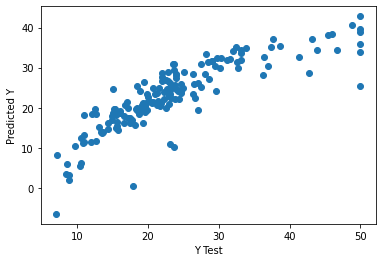

In [ ]:
plt.scatter(y_test,pred_y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# evaluate predictions
mse = mean_squared_error(y_test,pred_y)
print('MSE: %.3f' % mse)

MSE: 27.101


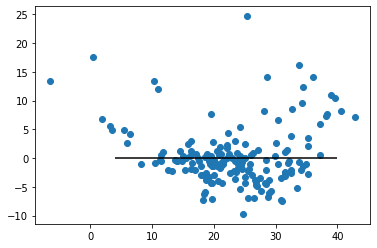

In [ ]:
#NORMALITY if ERROR
resid = y_test - pred_y
resid = pd.Series(resid)
plt.scatter(pred_y,resid)
plt.hlines(0,4,40) #no pattersn obbserver 
#in case of any issues we may have to look for log Transformation etc...

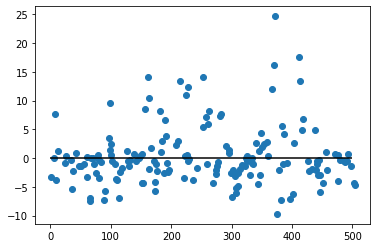

In [ ]:
#independence of ERROS
plt.scatter(resid.index,resid.values)
plt.hlines(0,0,500)
#again no appearent patteren , so our moel doing fine

In [ ]:
#independence of ERROS (Other method)
from statsmodels.stats.stattools import durbin_watson

durbin_watson(resid)

#0 neg serial co relation
#4 positive serial co relation
#2 no issue

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1.8841341731925505

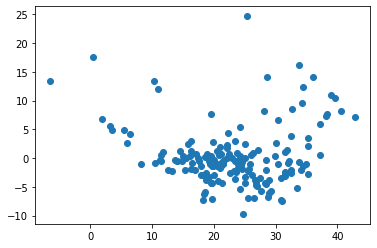

In [ ]:
plt.scatter(pred_y,resid)

# Outlier detection and removal using Z Score
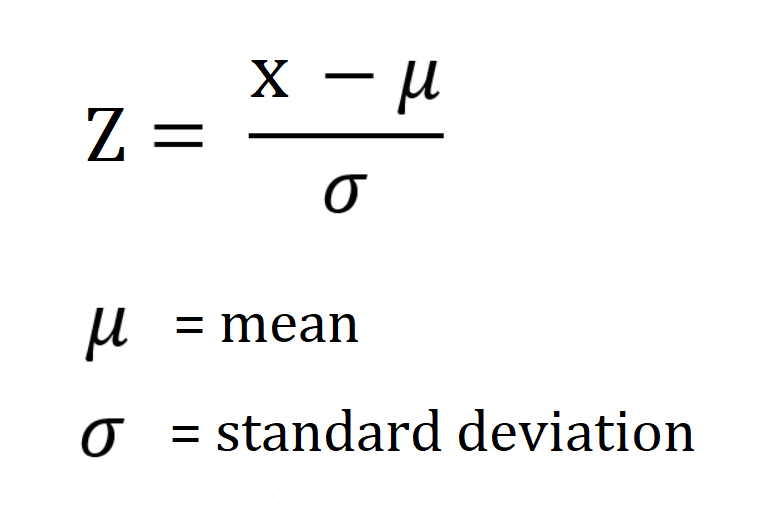

In [ ]:
df = bos1.copy()

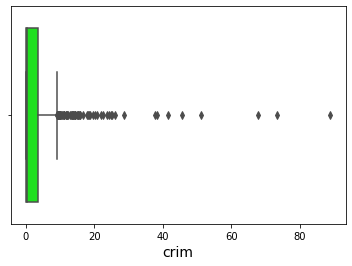

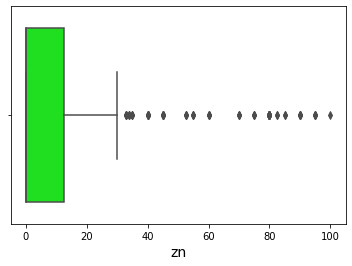

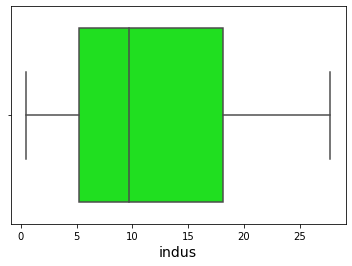

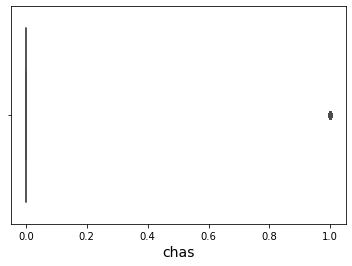

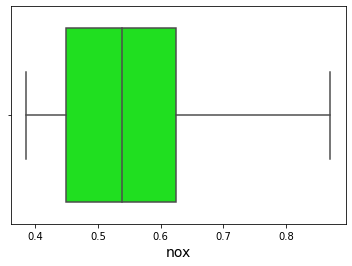

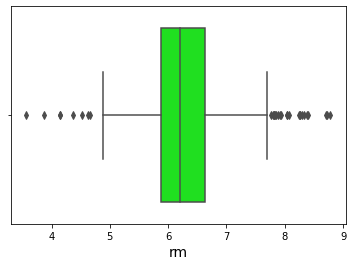

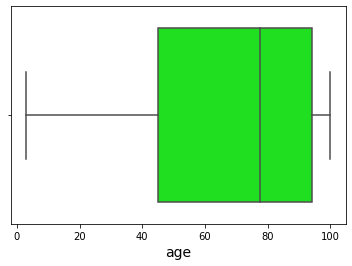

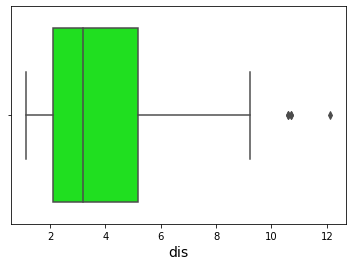

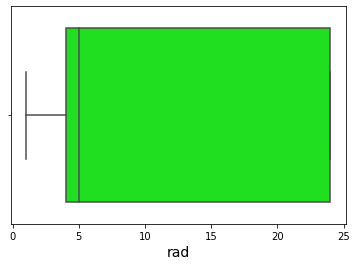

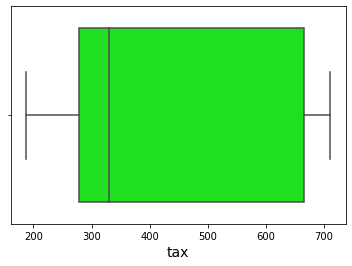

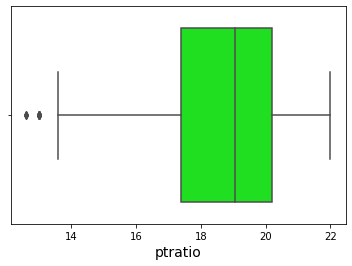

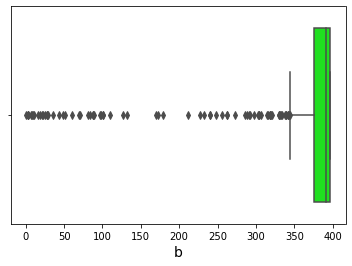

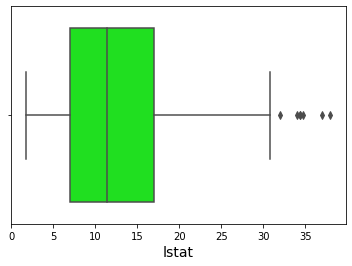

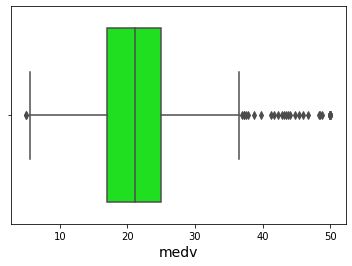

In [ ]:
#___________________________________________
# First check with box plot 
#___________________________________________

# let's try to plot boxplot with seaborn
for columns in df.columns.values:
  sns.boxplot(x=df[columns], color='lime')
  plt.xlabel(columns, fontsize=14)
  plt.show()

In [ ]:
df['zscore'] = ( df.crim - df.crim.mean() ) / df.crim.std()
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,zscore
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,-0.419367
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,-0.416927
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,-0.416929
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,-0.416338
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,-0.412074


Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away

In [ ]:
df[df['zscore']>3]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,zscore
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4,9.924110
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0,4.038609
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5,4.408008
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0,7.476247
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0,5.524853
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0,4.898257
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8,8.128839
427,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9,3.958402


In [ ]:
df[df['zscore']<-3]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,zscore


Here is the list of all outliers

In [ ]:
df[(df.zscore<-3) | (df.zscore>3)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,zscore
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4,9.924110
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0,4.038609
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5,4.408008
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0,7.476247
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0,5.524853
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0,4.898257
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8,8.128839
427,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9,3.958402


## Remove the outliers and produce new dataframe

In [ ]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,zscore
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,-0.419367
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,-0.416927
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,-0.416929
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,-0.416338
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,-0.412074


In [ ]:
df_no_outliers.shape

(498, 15)

In [ ]:
df.shape

(506, 15)

In [ ]:
x = df_no_outliers.iloc[:,0:13]
y = df_no_outliers["medv"]

In [ ]:
from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.33, random_state =10)

In [ ]:
x_train.shape

(333, 13)

In [ ]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [ ]:
#Equation coefficient and Intercept
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficient: 
 [-1.05849016e-02  5.48053476e-02 -1.20240484e-02  3.59928414e+00
 -1.69448165e+01  3.81234740e+00  8.89971606e-03 -1.43895749e+00
  2.90350444e-01 -1.08989409e-02 -8.73036232e-01  1.50581315e-02
 -5.33812593e-01]
Intercept: 
 31.67903572580051


In [ ]:
pred_y = lm.predict(x_test)
print(y_test)

389    11.5
249    26.2
400     5.6
305    28.4
146    15.6
       ... 
325    24.6
466    19.0
276    33.2
113    18.7
193    31.1
Name: medv, Length: 165, dtype: float64


In [ ]:
pred_y

Text(0, 0.5, 'Predicted Y')

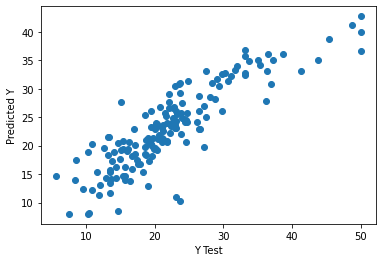

In [ ]:
plt.scatter(y_test,pred_y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn.metrics import mean_squared_error
# evaluate predictions
mse = mean_squared_error(y_test,pred_y)
print('MSE: %.3f' % mse)

MSE: 18.603


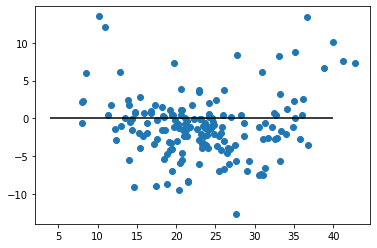

In [ ]:
#NORMALITY if ERROR
resid = y_test - pred_y
resid = pd.Series(resid)
plt.scatter(pred_y,resid)
plt.hlines(0,4,40) #no pattersn obbserver 
#in case of any issues we may have to look for log Transformation etc...

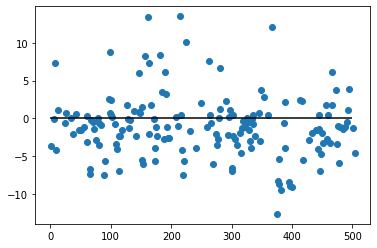

In [ ]:
#independence of ERROS
plt.scatter(resid.index,resid.values)
plt.hlines(0,0,500)
#again no appearent patteren , so our moel doing fine

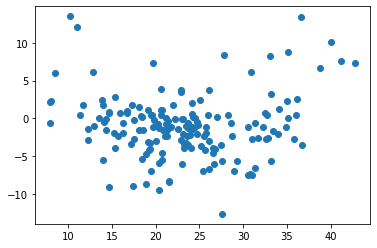

In [ ]:
plt.scatter(pred_y,resid)

# Outlier Detection and Removal Using IQR

In [ ]:
df = bos1.copy()

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Detect outliers using IQR

In [ ]:
Q1 = df.crim.quantile(0.25)
Q3 = df.crim.quantile(0.75)
Q1, Q3

(0.08204499999999999, 3.6770824999999996)

In [ ]:
IQR = Q3 - Q1
IQR

3.5950374999999997

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-5.310511249999999, 9.06963875)

**Here are the outliers**

In [ ]:
df[(df.crim<lower_limit)|(df.crim>upper_limit)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
367,13.5222,0.0,18.1,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1
371,9.2323,0.0,18.1,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
373,11.1081,0.0,18.1,0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,13.8
374,18.4982,0.0,18.1,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
375,19.6091,0.0,18.1,0,0.671,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,15.5757,0.0,18.1,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13,19.1
469,13.0751,0.0,18.1,0,0.580,5.713,56.7,2.8237,24,666,20.2,396.90,14.76,20.1
477,15.0234,0.0,18.1,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
478,10.2330,0.0,18.1,0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03,14.6



**Remove outliers**



In [ ]:
df_no_outlier = df[(df.crim>lower_limit)&(df.crim<upper_limit)]
df_no_outlier

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df_no_outlier.shape

(440, 14)

In [ ]:
df.shape

(506, 14)

In [ ]:
x = df_no_outliers.iloc[:,0:13]
y = df_no_outliers["medv"]

In [ ]:
from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.33, random_state =10)

In [ ]:
x_train.shape

(333, 13)

In [ ]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [ ]:
#Equation coefficient and Intercept
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficient: 
 [-1.05849016e-02  5.48053476e-02 -1.20240484e-02  3.59928414e+00
 -1.69448165e+01  3.81234740e+00  8.89971606e-03 -1.43895749e+00
  2.90350444e-01 -1.08989409e-02 -8.73036232e-01  1.50581315e-02
 -5.33812593e-01]
Intercept: 
 31.67903572580051


In [ ]:
pred_y = lm.predict(x_test)
print(y_test)

389    11.5
249    26.2
400     5.6
305    28.4
146    15.6
       ... 
325    24.6
466    19.0
276    33.2
113    18.7
193    31.1
Name: medv, Length: 165, dtype: float64


Text(0, 0.5, 'Predicted Y')

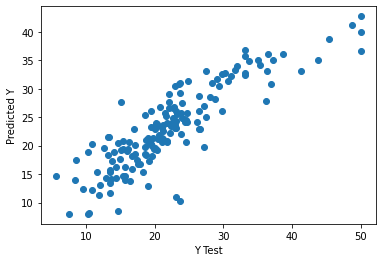

In [ ]:
plt.scatter(y_test,pred_y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn.metrics import mean_squared_error
# evaluate predictions
mse = mean_squared_error(y_test,pred_y)
print('MSE: %.3f' % mse)

MSE: 18.603


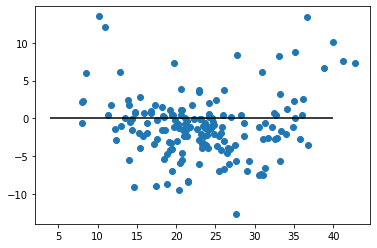

In [ ]:
#NORMALITY if ERROR
resid = y_test - pred_y
resid = pd.Series(resid)
plt.scatter(pred_y,resid)
plt.hlines(0,4,40) #no pattersn obbserver 
#in case of any issues we may have to look for log Transformation etc...

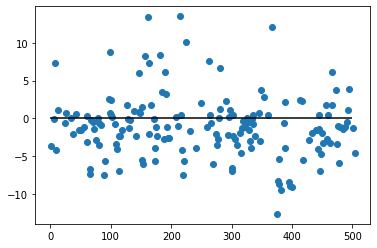

In [ ]:
#independence of ERROS
plt.scatter(resid.index,resid.values)
plt.hlines(0,0,500)
#again no appearent patteren , so our moel doing fine

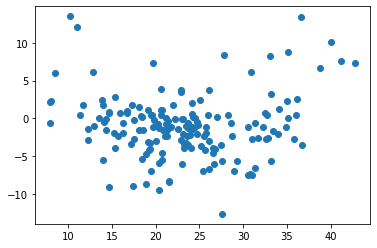

In [ ]:
plt.scatter(pred_y,resid)